# Exploratory Analysis and Visualizations for the CMO
<b>In this notebook, I would be running exploratory analysis on the already cleaned Online Retail Store dataset, attempting to provide answers to some questions that are likely to be of interest to the CMO of the business in a typical business scenario.

#### Questions of interest to the CMO:
* <b>Excluding the United kingdom from the analysis, what are the top 10 countries generating the highest revenue?
><b> The CMO is also interested in viewing the quantity sold along with the revenue generated for the top 10 countries generating the highest revenue, excluding The United Kingdom.
* <b>Provide the informations of the top 10 customers by revenue.
><b> The CMO is interested in the visuals that shows the top 10 revenue generating customers as well as their respective informations. The CMO wants to target the higher revenue generating customers and ensure that they remain satisfied with their products.

In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Importing the necessary libraries for this exploration
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
!pip install requests

In [4]:
#Importing the already cleaned online retail store data set from the download link below.
path='https://github.com/arovo-ds/Exploratory-Data-Analysis/raw/main/data/Cleaned%20Online%20Retail%20Data%20Set.xlsx'

In [5]:
!pip install openpyxl

In [6]:
!pip install xlrd

In [7]:
import requests
import io
resp = requests.get(path).content
retail = pd.read_excel(resp)

In [8]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom


In [9]:
#Creating a column for Revenue
retail['Revenue'] = retail['Quantity'] * retail['UnitPrice']
retail.Revenue = retail.Revenue.round(2)
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom,20.34


NB: I would like to state that I already have a same business scenario for this same data set, where I explored likely questions that a CEO would want asnwers to and can be accessed via the address:

## Question 1
<b> Excluding the United Kingdom from the analysis, what are the top 10 countries generating the highest revenue?

In [10]:
# Set the URL of the file you want to read
url = "https://github.com/arovo-ds/Exploratory-Data-Analysis/raw/main/data/Revenue%20by%20Country.xlsx"

# Send a GET request to the URL and store the response
response = requests.get(url)

In [11]:
country_revenue = pd.read_excel(response.content)
country_revenue

,Country,Revenue
0,United Kingdom,7308391.55
1,Netherlands,285446.34
2,Ireland,265545.90
3,Germany,228867.14
4,France,209024.05
5,Australia,138521.31
6,Spain,61577.11
7,Switzerland,56443.95
8,Belgium,41196.34
9,Sweden,38378.33


<b>The CMO wants a revenue by country analysis that excludes the United Kingdom, so I'd would be dropping the United Kingdom row from the dataset.

In [12]:
country_revenue_excluding_UK = country_revenue.drop([0], axis=0)
country_revenue_excluding_UK

,Country,Revenue
1,Netherlands,285446.34
2,Ireland,265545.90
3,Germany,228867.14
4,France,209024.05
5,Australia,138521.31
6,Spain,61577.11
7,Switzerland,56443.95
8,Belgium,41196.34
9,Sweden,38378.33
10,Japan,37416.37


<b>I'd be producing a bar chart visual representation of the revenue by country analysis that excludes the United Kingdom.

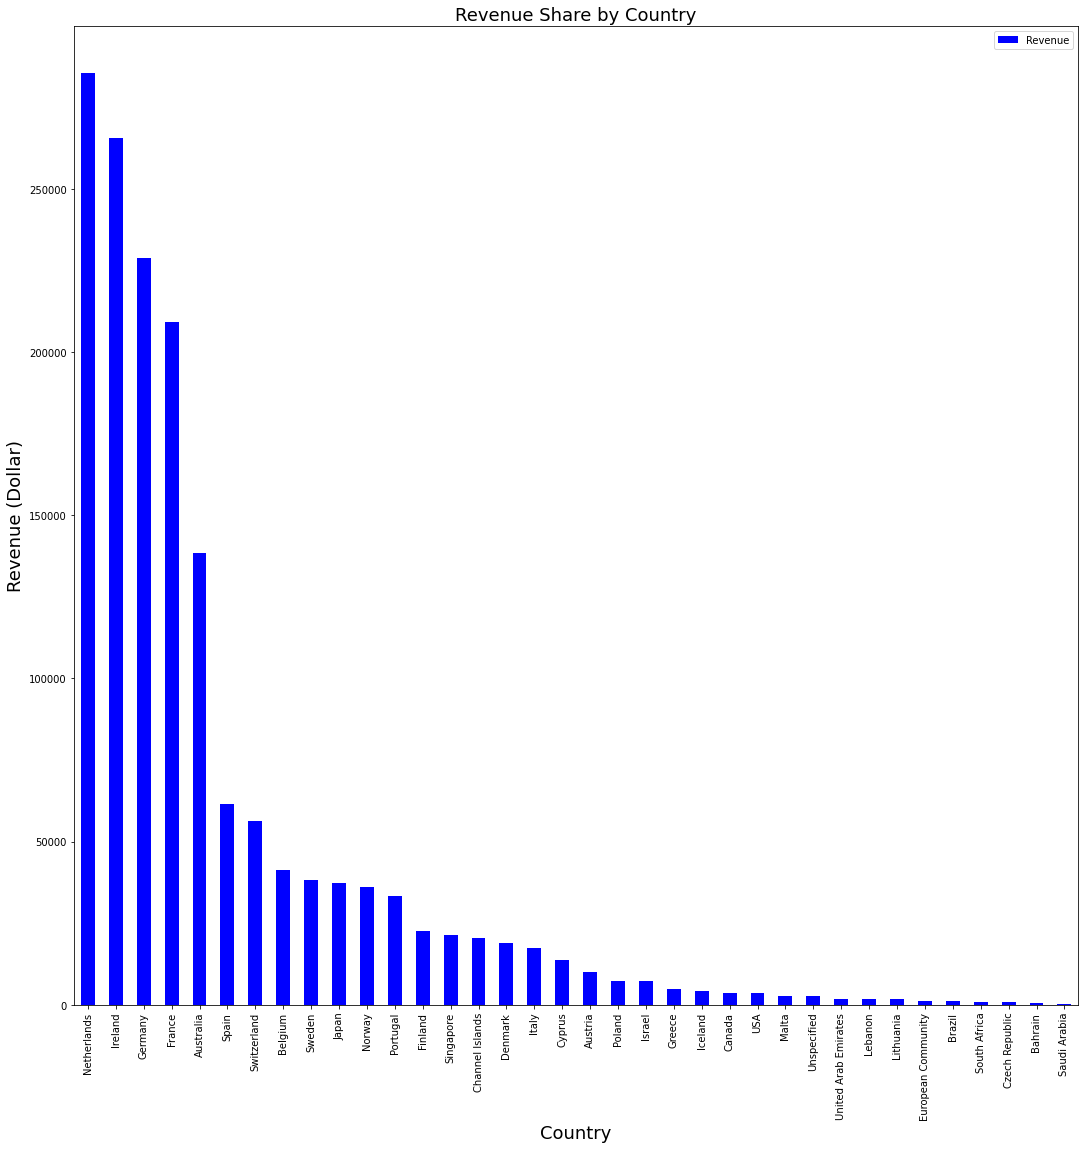

In [13]:
#Producing a visual representation for the revenue by country (excluding the United Kingdom) analysis.
country_revenue_excluding_UK.plot(x='Country', y='Revenue', kind='bar', color='b', figsize=(18,18))
plt.title('Revenue Share by Country', fontsize=18)
plt.xlabel('Country', fontsize=18)
plt.ylabel('Revenue (Dollar)', fontsize=18)


plt.show()

> ## Deduction
> <b> from the graph produced above for the revenue by country (excluding the United Kingdom) analysis, we can deduct the following:
> * <b> The Netherlands has the largest revenue share amongst the countriess where the online retail store business is opeartional, with a total revenue of about ***\\$285, 446.34***.
> * <b> The Netherlands is closely followed by Ireland with revenue difference margin of ***\\$19, 900.44***. Ireland has a revenue share of ***\\$265, 545.90***.
> * <b> Saudi Arabia generates the least revenue for the business with only ***\\$145.92*** in revenue share.

<b>However, just as the CMO of the business requires, I'd go ahead to produce only the top 10 revenue share by country. I would also produce the top 10 quantity sold by country and compare both data to see if there's a relationship between both features.

In [14]:
#Producing a dataset for the top10 countries by revenue, excluding the United Kingdom.
top10_revenue = country_revenue_excluding_UK.nlargest(10, 'Revenue')
top10_revenue

,Country,Revenue
1,Netherlands,285446.34
2,Ireland,265545.90
3,Germany,228867.14
4,France,209024.05
5,Australia,138521.31
6,Spain,61577.11
7,Switzerland,56443.95
8,Belgium,41196.34
9,Sweden,38378.33
10,Japan,37416.37


In [15]:
# Set the URL of the file you want to read
url = "https://github.com/arovo-ds/Exploratory-Data-Analysis/raw/main/data/Quantity%20by%20Country.xlsx"

# Send a GET request to the URL and store the response
response = requests.get(url)

In [16]:
country_quantity = pd.read_excel(response.content)
country_quantity

,Country,Quantity
0,United Kingdom,4256740
1,Netherlands,200361
2,Ireland,140275
3,Germany,119261
4,France,111471
5,Australia,83901
6,Spain,27940
7,Switzerland,30082
8,Belgium,23237
9,Sweden,36083


<b>Again, excluding the data for the United Kingdom  and focusing only on the top 10 quanty by country.<b/>

In [17]:
country_quantity_excludingUK = country_quantity.drop([0], axis=0)
top10_quantity = country_quantity_excludingUK.nlargest(10, 'Quantity')
top10_quantity

,Country,Quantity
1,Netherlands,200361
2,Ireland,140275
3,Germany,119261
4,France,111471
5,Australia,83901
9,Sweden,36083
7,Switzerland,30082
6,Spain,27940
10,Japan,26016
8,Belgium,23237


<b> Comparing the set of countries in both datasets; top10_revenue and top10_quantity, it could be observed that they both have the same set of countries and it is thus possible to investigate if these set of countries have some sort of relationship between their revenue and quantity.

<b> I'd be doing this by plotting a multiple(2) bar chart.

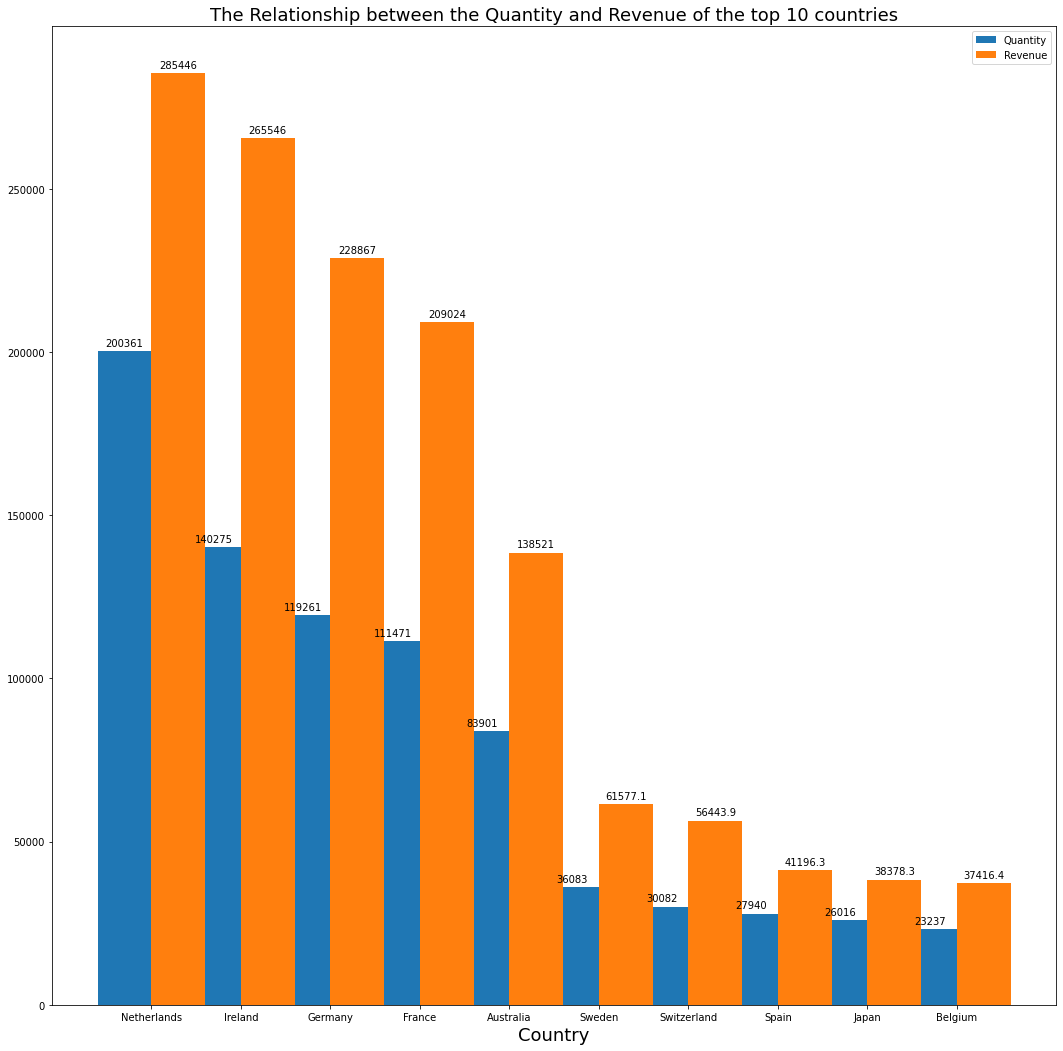

In [18]:
#Ploting the relationship between the demand and revenue of the countries with the highest demands and revenue share using 
#multiple(2) bar chart.

x = np.arange(len(top10_quantity.Country))
width = .6 #the width of the bar
fig, ax = plt.subplots(figsize=(18, 18))
bar1 = ax.bar(x - width/2, top10_quantity.Quantity, width, label='Quantity')
bar2 = ax.bar(x + width/2, top10_revenue.Revenue, width, label='Revenue')

ax.set_title('The Relationship between the Quantity and Revenue of the top 10 countries', fontsize=18)
ax.set_xlabel('Country', fontsize=18)
ax.set_xticks(x, top10_quantity.Country)
ax.legend()

ax.bar_label(bar1, padding=3)
ax.bar_label(bar2, padding=3)

plt.show()

> <b>It does appears that there is some sort of relationship between the quantity of the business products purchased by each country and the amount of revenue generated by the country, as the 2 bar chart produced above have shown that for countries with large quantity also generated seeming large revenues. 

## Question 2

<b>Provide the informations of the top 10 customers by revenue.

<b> In an attempt to produce the information of the top 10 revenue generating customers, I'd would also be providing basic customer based infrmation with respect to revenue genrated.
    
<b> I'd begin by grouping the retail dataset by customer's ID.

In [19]:
#Groupoing the retaik dataset by the dataset CustomerId feature.
customer_revenue = retail.groupby('CustomerID', as_index=False).sum().sort_values(by='Revenue', ascending=False)
customer_revenue.head()

,CustomerID,InvoiceNo,Quantity,UnitPrice,Revenue
1689,14646,1161009007,196915,5176.09,280206.02
4201,18102,243297801,64124,1940.92,259657.30
3728,17450,188845149,69993,1143.32,194550.79
3008,16446,1688629,80997,4.98,168472.50
1879,14911,3195272173,80265,26185.72,143825.06


In [20]:
#Obtaining certain information from this Revenue by CustomerID dataset.
print(f"A total of {customer_revenue.Revenue.nunique()} customers patronised the business, and cummulatively generated a total revenue of ${customer_revenue.Revenue.sum():,.2f}.")
print(f"The customer with the ID {customer_revenue[customer_revenue.Revenue==customer_revenue.Revenue.min()]['CustomerID'].values[0]},\
contributed the least to the total revenue with about ${customer_revenue[customer_revenue.Revenue==customer_revenue.Revenue.min()]['Revenue'].values[0]},",\
     f"while the customer with the ID {customer_revenue[customer_revenue.Revenue==customer_revenue.Revenue.max()]['CustomerID'].values[0]} contributed\
the most to the total revenue with about ${customer_revenue[customer_revenue.Revenue==customer_revenue.Revenue.max()]['Revenue'].values[0]:,.2f}. in revenue")

A total of 4242 customers patronised the business, and cummulatively generated a total revenue of $8,911,407.90.
The customer with the ID 16738,contributed the least to the total revenue with about $3.75, while the customer with the ID 14646 contributedthe most to the total revenue with about $280,206.02. in revenue


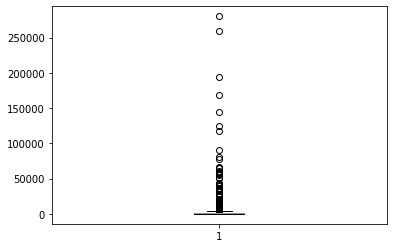

In [21]:
#Plotting a box and whiskers plot to show the distribution of the each customer's contribution to the business revenue.
plt.boxplot(customer_revenue.Revenue)
plt.show()

> ## Deduction
> <b>Investigating the boxplot plotted above, shows that the larger number of the total customers individually contributes way less than ***\\$100, 000*** to the total revenue, while a little portion of the customer base; only about 7 customers individually contributes above ***\\$100, 000*** to the business revenue.
>
> <b>I can then claim that, the business revenue is largely dependent on the revenue contributed by this very few customers compared to the total business customer base. Therefore, loosing one of this customer, would transcend to a drop in the revenue generated by the business.

<b>I'd now go ahead to extract the data of the top ten revenue generating customers of the business off the dataset just as the CMO of the business requires.

In [22]:
#Extracting the data of the top 10 revenue contributing customer off the retail dataset, but I'd first print out the top10_customer.
top10_customer = customer_revenue.nlargest(10, 'Revenue')
top10_customer

,CustomerID,InvoiceNo,Quantity,UnitPrice,Revenue
1689,14646,1161009007,196915,5176.09,280206.02
4201,18102,243297801,64124,1940.92,259657.30
3728,17450,188845149,69993,1143.32,194550.79
3008,16446,1688629,80997,4.98,168472.50
1879,14911,3195272173,80265,26185.72,143825.06
55,12415,397415806,77374,2097.08,124914.53
1333,14156,780541003,57885,5357.68,117379.63
3771,17511,538173446,64549,2221.28,91062.38
2702,16029,134645942,40208,8722.39,81024.84
0,12346,541431,74215,1.04,77183.60


<b>Since I also need the location information about each of the top 10 revenue generating customers, I'd be making my queries from the retail dataset.

<b>Below are the set of informations (Column ID and Description) Id would try to gather from each customer in top 10 revenue generating customers set:
* <b>CustomerID: Unique Identity number for each customer in this set, same as their respecvtive ID's in the original dataset.
* <b>Country: The respective country from where each customer is making their online purchase from.
* <b>NoInvoices: The unique number of invoices each customer gets from their transaction, as this could refelect the number of times they patronized the business.
* <b>UniqueItem(StockCode): The number of unique item the customer purchaased, tracked with the number of unique stock code.
* <b>UniqueItem(Description): The number of unique item the customer purchaased, tracked with the number of unique item descriotion.
* <b>MostPurchase: This would display the most purchased item by the customer, and would be obtained by querying the column of the retail dataset.
* <b>QuantityMostPurchase: This would reflect the quantity of the customers most purchased item.
* <b>UnitPriceMostPurchase: This would reflect the unit price of the most purchasd item.
* <b>MostExpensive: This would show the most expensive item the customer purchased.
* <b>QuantityMostExpensive: The quantity of the most expensive item the customer purchased.
* <b>UnitPriceMostExpensive: The unit price of the most expensive item the customer purchased.
* <b>NoDaysPatronage: This would refelect the number of days the customr patronised the business.
* <b> CustomerTotalRevenue: This would show the ccustomers total revenue.

<b>1. Extracting the information for customer with customer ID 14646.

In [23]:
#Extracting the information for customer with customer ID 14646.
customer14646 = retail.loc[retail.CustomerID== 14646]
print("Below are some of the extractable informations about the customer with ID: 14646.")
country = customer14646.Country.unique()
unique_country = "".join(country)
print(f"- Country: {unique_country}.")
print(f"- Number of unique invoices: {customer14646.InvoiceNo.nunique()} unique invoices.")
print(f"- Number of unique items purchased(stock code): {customer14646.StockCode.nunique()} unique items by stock code.")
print(f"- Number of unique items purchased(items decsription): {customer14646.Description.nunique()} unique items by quantity.")
print(f"- Most purcahsed item: '{customer14646[customer14646.Quantity==customer14646.Quantity.max()]['Description'].values[0]}'\
is the customer's most purchased item. The customer purchsed {customer14646[customer14646.Quantity==customer14646.Quantity.max()]['Quantity'].values[0]}\
 units, at the unit   price of ${customer14646[customer14646.Quantity==customer14646.Quantity.max()]['UnitPrice'].values[0]}.")
print(f"- The customer's most expensive purchased item: '{customer14646[customer14646.UnitPrice==customer14646.UnitPrice.max()]['Description'].values[0]}' is the customer's\
 most expensive purchased      item, and the customer bought {customer14646[customer14646.UnitPrice==customer14646.UnitPrice.max()]['Quantity'].values[0]} units\
 at the unit price of '${customer14646[customer14646.UnitPrice==customer14646.UnitPrice.max()]['UnitPrice'].values[0]:,.2f}'.")
print(f"- Number of days customer patronised the business: {customer14646.InvoiceDate.nunique()} days.")
print(f"- customer 14646 total revenue is: ${customer14646.Revenue.sum():,.2f}.")

Below are some of the extractable informations about the customer with ID: 14646.
- Country: Netherlands.
- Number of unique invoices: 73 unique invoices.
- Number of unique items purchased(stock code): 700 unique items by stock code.
- Number of unique items purchased(items decsription): 718 unique items by quantity.
- Most purcahsed item: 'RABBIT NIGHT LIGHT'is the customer's most purchased item. The customer purchsed 2400 units, at the unit   price of $2.08.
- The customer's most expensive purchased item: 'CHEST NATURAL WOOD 20 DRAWERS' is the customer's most expensive purchased      item, and the customer bought 2 units at the unit price of '$110.00'.
- Number of days customer patronised the business: 45 days.
- customer 14646 total revenue is: $280,206.02.


<b>2. Extracting the information for customer with customer ID 18102.

In [24]:
#Extracting the information for customer with customer ID 18102.
customer18102 = retail.loc[retail.CustomerID== 18102]
print("Below are some of the extractable informations about the customer with ID: 18102.")
country = customer18102.Country.unique()
unique_country = "".join(country)
print(f"- Country: {unique_country}.")
print(f"- Number of unique invoices: {customer18102.InvoiceNo.nunique()} unique invoices.")
print(f"- Number of unique items purchased(stock code): {customer18102.StockCode.nunique()} unique items by stock code.")
print(f"- Number of unique items purchased(items decsription): {customer18102.Description.nunique()} unique items by quantity.")
print(f"- Most purcahsed item: '{customer18102[customer18102.Quantity==customer18102.Quantity.max()]['Description'].values[0]}'\
is the customer's most purchased item. The customer purchsed {customer18102[customer18102.Quantity==customer18102.Quantity.max()]['Quantity'].values[0]}\
 units, at the unit   price of ${customer18102[customer18102.Quantity==customer18102.Quantity.max()]['UnitPrice'].values[0]}.")
print(f"- The customer's most expensive purchased item: '{customer18102[customer18102.UnitPrice==customer18102.UnitPrice.max()]['Description'].values[0]}' is the customer's\
 most expensive purchased      item, and the customer bought {customer18102[customer18102.UnitPrice==customer18102.UnitPrice.max()]['Quantity'].values[0]} units\
 at the unit price of '${customer18102[customer18102.UnitPrice==customer18102.UnitPrice.max()]['UnitPrice'].values[0]:,.2f}'.")
print(f"- Number of days customer patronised the business: {customer18102.InvoiceDate.nunique()} days.")
print(f"- customer 18102 total revenue is: ${customer18102.Revenue.sum():,.2f}.")

Below are some of the extractable informations about the customer with ID: 18102.
- Country: United Kingdom.
- Number of unique invoices: 60 unique invoices.
- Number of unique items purchased(stock code): 150 unique items by stock code.
- Number of unique items purchased(items decsription): 162 unique items by quantity.
- Most purcahsed item: 'CREAM HEART CARD HOLDER'is the customer's most purchased item. The customer purchsed 1008 units, at the unit   price of $2.31.
- The customer's most expensive purchased item: 'VINTAGE POST OFFICE CABINET' is the customer's most expensive purchased      item, and the customer bought 10 units at the unit price of '$52.77'.
- Number of days customer patronised the business: 26 days.
- customer 18102 total revenue is: $259,657.30.


<b>3. Extracting the information for customer with customer ID 17450.

In [25]:
#Extracting the information for customer with customer ID 17450.
customer17450 = retail.loc[retail.CustomerID== 17450]
print("Below are some of the extractable informations about the customer with ID: 17450.")
country = customer17450.Country.unique()
unique_country = "".join(country)
print(f"- Country: {unique_country}.")
print(f"- Number of unique invoices: {customer17450.InvoiceNo.nunique()} unique invoices.")
print(f"- Number of unique items purchased(stock code): {customer17450.StockCode.nunique()} unique items by stock code.")
print(f"- Number of unique items purchased(items decsription): {customer17450.Description.nunique()} unique items by quantity.")
print(f"- Most purcahsed item: '{customer17450[customer17450.Quantity==customer17450.Quantity.max()]['Description'].values[0]}'\
is the customer's most purchased item. The customer purchsed {customer17450[customer17450.Quantity==customer17450.Quantity.max()]['Quantity'].values[0]}\
 units, at the unit   price of ${customer17450[customer17450.Quantity==customer17450.Quantity.max()]['UnitPrice'].values[0]}.")
print(f"- The customer's most expensive purchased item: '{customer17450[customer17450.UnitPrice==customer17450.UnitPrice.max()]['Description'].values[0]}' is the customer's\
 most expensive purchased      item, and the customer bought {customer17450[customer17450.UnitPrice==customer17450.UnitPrice.max()]['Quantity'].values[0]} units\
 at the unit price of '${customer17450[customer17450.UnitPrice==customer17450.UnitPrice.max()]['UnitPrice'].values[0]:,.2f}'.")
print(f"- Number of days customer patronised the business: {customer17450.InvoiceDate.nunique()} days.")
print(f"- customer 17450 total revenue is: ${customer17450.Revenue.sum():,.2f}.")

Below are some of the extractable informations about the customer with ID: 17450.
- Country: United Kingdom.
- Number of unique invoices: 46 unique invoices.
- Number of unique items purchased(stock code): 124 unique items by stock code.
- Number of unique items purchased(items decsription): 125 unique items by quantity.
- Most purcahsed item: 'GREEN VINTAGE SPOT BEAKER'is the customer's most purchased item. The customer purchsed 1944 units, at the unit   price of $1.08.
- The customer's most expensive purchased item: 'CREAM SWEETHEART MINI CHEST' is the customer's most expensive purchased      item, and the customer bought 160 units at the unit price of '$12.98'.
- Number of days customer patronised the business: 27 days.
- customer 17450 total revenue is: $194,550.79.


<b>4. Extracting the information for customer with customer ID 16446.

In [26]:
#Extracting the information for customer with customer ID 16446.
customer16446 = retail.loc[retail.CustomerID== 16446]
print("Below are some of the extractable informations about the customer with ID: 16446.")
country = customer16446.Country.unique()
unique_country = "".join(country)
print(f"- Country: {unique_country}.")
print(f"- Number of unique invoices: {customer16446.InvoiceNo.nunique()} unique invoices.")
print(f"- Number of unique items purchased(stock code): {customer16446.StockCode.nunique()} unique items by stock code.")
print(f"- Number of unique items purchased(items decsription): {customer16446.Description.nunique()} unique items by quantity.")
print(f"- Most purcahsed item: '{customer16446[customer16446.Quantity==customer16446.Quantity.max()]['Description'].values[0]}'\
is the customer's most purchased item. The customer purchsed {customer16446[customer16446.Quantity==customer16446.Quantity.max()]['Quantity'].values[0]}\
 units, at the unit   price of ${customer16446[customer16446.Quantity==customer16446.Quantity.max()]['UnitPrice'].values[0]}.")
print(f"- The customer's most expensive purchased item: '{customer16446[customer16446.UnitPrice==customer16446.UnitPrice.max()]['Description'].values[0]}' is the customer's\
 most expensive purchased      item, and the customer bought {customer16446[customer16446.UnitPrice==customer16446.UnitPrice.max()]['Quantity'].values[0]} units\
 at the unit price of '${customer16446[customer16446.UnitPrice==customer16446.UnitPrice.max()]['UnitPrice'].values[0]:,.2f}'.")
print(f"- Number of days customer patronised the business: {customer16446.InvoiceDate.nunique()} days.")
print(f"- customer 16446 total revenue is: ${customer16446.Revenue.sum():,.2f}.")

Below are some of the extractable informations about the customer with ID: 16446.
- Country: United Kingdom.
- Number of unique invoices: 2 unique invoices.
- Number of unique items purchased(stock code): 3 unique items by stock code.
- Number of unique items purchased(items decsription): 3 unique items by quantity.
- Most purcahsed item: 'PAPER CRAFT , LITTLE BIRDIE'is the customer's most purchased item. The customer purchsed 80995 units, at the unit   price of $2.08.
- The customer's most expensive purchased item: 'PAPER CRAFT , LITTLE BIRDIE' is the customer's most expensive purchased      item, and the customer bought 80995 units at the unit price of '$2.08'.
- Number of days customer patronised the business: 2 days.
- customer 16446 total revenue is: $168,472.50.


<b>5. Extracting the information for customer with customer ID 14911.

In [27]:
#Extracting the information for customer with customer ID 14911.
customer14911 = retail.loc[retail.CustomerID== 16446]
print("Below are some of the extractable informations about the customer with ID: 14911.")
country = customer14911.Country.unique()
unique_country = "".join(country)
print(f"- Country: {unique_country}.")
print(f"- Number of unique invoices: {customer14911.InvoiceNo.nunique()} unique invoices.")
print(f"- Number of unique items purchased(stock code): {customer14911.StockCode.nunique()} unique items by stock code.")
print(f"- Number of unique items purchased(items decsription): {customer14911.Description.nunique()} unique items by quantity.")
print(f"- Most purcahsed item: '{customer14911[customer14911.Quantity==customer14911.Quantity.max()]['Description'].values[0]}'\
is the customer's most purchased item. The customer purchsed {customer14911[customer14911.Quantity==customer14911.Quantity.max()]['Quantity'].values[0]}\
 units, at the unit   price of ${customer14911[customer14911.Quantity==customer14911.Quantity.max()]['UnitPrice'].values[0]}.")
print(f"- The customer's most expensive purchased item: '{customer14911[customer14911.UnitPrice==customer14911.UnitPrice.max()]['Description'].values[0]}' is the customer's\
 most expensive purchased      item, and the customer bought {customer14911[customer14911.UnitPrice==customer14911.UnitPrice.max()]['Quantity'].values[0]} units\
 at the unit price of '${customer14911[customer14911.UnitPrice==customer14911.UnitPrice.max()]['UnitPrice'].values[0]:,.2f}'.")
print(f"- Number of days customer patronised the business: {customer14911.InvoiceDate.nunique()} days.")
print(f"- customer 14911 total revenue is: ${customer14911.Revenue.sum():,.2f}.")

Below are some of the extractable informations about the customer with ID: 14911.
- Country: United Kingdom.
- Number of unique invoices: 2 unique invoices.
- Number of unique items purchased(stock code): 3 unique items by stock code.
- Number of unique items purchased(items decsription): 3 unique items by quantity.
- Most purcahsed item: 'PAPER CRAFT , LITTLE BIRDIE'is the customer's most purchased item. The customer purchsed 80995 units, at the unit   price of $2.08.
- The customer's most expensive purchased item: 'PAPER CRAFT , LITTLE BIRDIE' is the customer's most expensive purchased      item, and the customer bought 80995 units at the unit price of '$2.08'.
- Number of days customer patronised the business: 2 days.
- customer 14911 total revenue is: $168,472.50.


<b>6. Extracting the information for customer with customer ID 12415.

In [28]:
#Extracting the information for customer with customer ID 12415.
customer12415 = retail.loc[retail.CustomerID== 12415]
print("Below are some of the extractable informations about the customer with ID: 12415.")
country = customer12415.Country.unique()
unique_country = "".join(country)
print(f"- Country: {unique_country}.")
print(f"- Number of unique invoices: {customer12415.InvoiceNo.nunique()} unique invoices.")
print(f"- Number of unique items purchased(stock code): {customer12415.StockCode.nunique()} unique items by stock code.")
print(f"- Number of unique items purchased(items decsription): {customer12415.Description.nunique()} unique items by quantity.")
print(f"- Most purcahsed item: '{customer12415[customer12415.Quantity==customer12415.Quantity.max()]['Description'].values[0]}'\
is the customer's most purchased item. The customer purchsed {customer12415[customer12415.Quantity==customer12415.Quantity.max()]['Quantity'].values[0]}\
 units, at the unit   price of ${customer12415[customer12415.Quantity==customer12415.Quantity.max()]['UnitPrice'].values[0]}.")
print(f"- The customer's most expensive purchased item: '{customer12415[customer12415.UnitPrice==customer12415.UnitPrice.max()]['Description'].values[0]}' is the customer's\
 most expensive purchased      item, and the customer bought {customer12415[customer12415.UnitPrice==customer12415.UnitPrice.max()]['Quantity'].values[0]} units\
 at the unit price of '${customer12415[customer12415.UnitPrice==customer12415.UnitPrice.max()]['UnitPrice'].values[0]:,.2f}'.")
print(f"- Number of days customer patronised the business: {customer12415.InvoiceDate.nunique()} days.")
print(f"- customer 12415 total revenue is: ${customer12415.Revenue.sum():,.2f}.")

Below are some of the extractable informations about the customer with ID: 12415.
- Country: Australia.
- Number of unique invoices: 21 unique invoices.
- Number of unique items purchased(stock code): 444 unique items by stock code.
- Number of unique items purchased(items decsription): 451 unique items by quantity.
- Most purcahsed item: 'MINI PAINT SET VINTAGE 'is the customer's most purchased item. The customer purchsed 1152 units, at the unit   price of $0.55.
- The customer's most expensive purchased item: 'POSTAGE' is the customer's most expensive purchased      item, and the customer bought 1 units at the unit price of '$350.00'.
- Number of days customer patronised the business: 16 days.
- customer 12415 total revenue is: $124,914.53.


<b>7. Extracting the information for customer with customer ID 14156.

In [29]:
#Extracting the information for customer with customer ID 14156.
customer14156 = retail.loc[retail.CustomerID== 14156]
print("Below are some of the extractable informations about the customer with ID: 14156.")
country = customer14156.Country.unique()
unique_country = "".join(country)
print(f"- Country: {unique_country}.")
print(f"- Number of unique invoices: {customer14156.InvoiceNo.nunique()} unique invoices.")
print(f"- Number of unique items purchased(stock code): {customer14156.StockCode.nunique()} unique items by stock code.")
print(f"- Number of unique items purchased(items decsription): {customer14156.Description.nunique()} unique items by quantity.")
print(f"- Most purcahsed item: '{customer14156[customer14156.Quantity==customer14156.Quantity.max()]['Description'].values[0]}'\
is the customer's most purchased item. The customer purchsed {customer14156[customer14156.Quantity==customer14156.Quantity.max()]['Quantity'].values[0]}\
 units, at the unit   price of ${customer14156[customer14156.Quantity==customer14156.Quantity.max()]['UnitPrice'].values[0]}.")
print(f"- The customer's most expensive purchased item: '{customer14156[customer14156.UnitPrice==customer14156.UnitPrice.max()]['Description'].values[0]}' is the customer's\
 most expensive purchased      item, and the customer bought {customer14156[customer14156.UnitPrice==customer14156.UnitPrice.max()]['Quantity'].values[0]} units\
 at the unit price of '${customer14156[customer14156.UnitPrice==customer14156.UnitPrice.max()]['UnitPrice'].values[0]:,.2f}'.")
print(f"- Number of days customer patronised the business: {customer14156.InvoiceDate.nunique()} days.")
print(f"- customer 14156 total revenue is: ${customer14156.Revenue.sum():,.2f}.")

Below are some of the extractable informations about the customer with ID: 14156.
- Country: Ireland.
- Number of unique invoices: 55 unique invoices.
- Number of unique items purchased(stock code): 714 unique items by stock code.
- Number of unique items purchased(items decsription): 730 unique items by quantity.
- Most purcahsed item: 'ASSORTED INCENSE PACK'is the customer's most purchased item. The customer purchsed 1440 units, at the unit   price of $0.16.
- The customer's most expensive purchased item: 'CARRIAGE' is the customer's most expensive purchased      item, and the customer bought 1 units at the unit price of '$50.00'.
- Number of days customer patronised the business: 43 days.
- customer 14156 total revenue is: $117,379.63.


<b>8. Extracting the information for customer with customer ID 17511.

In [30]:
#Extracting the information for customer with customer ID 17511.
customer17511 = retail.loc[retail.CustomerID== 17511]
print("Below are some of the extractable informations about the customer with ID: 17511.")
country = customer17511.Country.unique()
unique_country = "".join(country)
print(f"- Country: {unique_country}.")
print(f"- Number of unique invoices: {customer17511.InvoiceNo.nunique()} unique invoices.")
print(f"- Number of unique items purchased(stock code): {customer17511.StockCode.nunique()} unique items by stock code.")
print(f"- Number of unique items purchased(items decsription): {customer17511.Description.nunique()} unique items by quantity.")
print(f"- Most purcahsed item: '{customer17511[customer17511.Quantity==customer17511.Quantity.max()]['Description'].values[0]}'\
is the customer's most purchased item. The customer purchsed {customer17511[customer17511.Quantity==customer17511.Quantity.max()]['Quantity'].values[0]}\
 units, at the unit   price of ${customer17511[customer17511.Quantity==customer17511.Quantity.max()]['UnitPrice'].values[0]}.")
print(f"- The customer's most expensive purchased item: '{customer17511[customer17511.UnitPrice==customer17511.UnitPrice.max()]['Description'].values[0]}' is the customer's\
 most expensive purchased      item, and the customer bought {customer17511[customer17511.UnitPrice==customer17511.UnitPrice.max()]['Quantity'].values[0]} units\
 at the unit price of '${customer17511[customer17511.UnitPrice==customer17511.UnitPrice.max()]['UnitPrice'].values[0]:,.2f}'.")
print(f"- Number of days customer patronised the business: {customer17511.InvoiceDate.nunique()} days.")
print(f"- customer 14156 total revenue is: ${customer17511.Revenue.sum():,.2f}.")

Below are some of the extractable informations about the customer with ID: 17511.
- Country: United Kingdom.
- Number of unique invoices: 31 unique invoices.
- Number of unique items purchased(stock code): 453 unique items by stock code.
- Number of unique items purchased(items decsription): 465 unique items by quantity.
- Most purcahsed item: 'RECYCLED PENCIL WITH RABBIT ERASER'is the customer's most purchased item. The customer purchsed 600 units, at the unit   price of $0.16.
- The customer's most expensive purchased item: 'CIRCUS PARADE BABY GIFT SET' is the customer's most expensive purchased      item, and the customer bought 1 units at the unit price of '$16.95'.
- Number of days customer patronised the business: 28 days.
- customer 14156 total revenue is: $91,062.38.


<b>9. Extracting the information for customer with customer ID 16029.

In [31]:
#Extracting the information for customer with customer ID 16029.
customer16029 = retail.loc[retail.CustomerID== 16029]
print("Below are some of the extractable informations about the customer with ID: 16029.")
country = customer16029.Country.unique()
unique_country = "".join(country)
print(f"- Country: {unique_country}.")
print(f"- Number of unique invoices: {customer16029.InvoiceNo.nunique()} unique invoices.")
print(f"- Number of unique items purchased(stock code): {customer16029.StockCode.nunique()} unique items by stock code.")
print(f"- Number of unique items purchased(items decsription): {customer16029.Description.nunique()} unique items by quantity.")
print(f"- Most purcahsed item: '{customer16029[customer16029.Quantity==customer16029.Quantity.max()]['Description'].values[0]}'\
is the customer's most purchased item. The customer purchsed {customer16029[customer16029.Quantity==customer16029.Quantity.max()]['Quantity'].values[0]}\
 units, at the unit   price of ${customer16029[customer16029.Quantity==customer16029.Quantity.max()]['UnitPrice'].values[0]}.")
print(f"- The customer's most expensive purchased item: '{customer16029[customer16029.UnitPrice==customer16029.UnitPrice.max()]['Description'].values[0]}' is the customer's\
 most expensive purchased      item, and the customer bought {customer16029[customer16029.UnitPrice==customer16029.UnitPrice.max()]['Quantity'].values[0]} units\
 at the unit price of '${customer16029[customer16029.UnitPrice==customer16029.UnitPrice.max()]['UnitPrice'].values[0]:,.2f}'.")
print(f"- Number of days customer patronised the business: {customer16029.InvoiceDate.nunique()} days.")
print(f"- customer 16029 total revenue is: ${customer16029.Revenue.sum():,.2f}.")

Below are some of the extractable informations about the customer with ID: 16029.
- Country: United Kingdom.
- Number of unique invoices: 63 unique invoices.
- Number of unique items purchased(stock code): 44 unique items by stock code.
- Number of unique items purchased(items decsription): 45 unique items by quantity.
- Most purcahsed item: 'GROW A FLYTRAP OR SUNFLOWER IN TIN'is the customer's most purchased item. The customer purchsed 2400 units, at the unit   price of $0.94.
- The customer's most expensive purchased item: 'POSTAGE' is the customer's most expensive purchased      item, and the customer bought 1 units at the unit price of '$8,142.75'.
- Number of days customer patronised the business: 39 days.
- customer 16029 total revenue is: $81,024.84.


<b>10. Extracting the information for customer with customer ID 12346.

In [32]:
#Extracting the information for customer with customer ID 12346.
customer12346 = retail.loc[retail.CustomerID== 12346]
print("Below are some of the extractable informations about the customer with ID: 12346.")
country = customer12346.Country.unique()
unique_country = "".join(country)
print(f"- Country: {unique_country}.")
print(f"- Number of unique invoices: {customer12346.InvoiceNo.nunique()} unique invoices.")
print(f"- Number of unique items purchased(stock code): {customer12346.StockCode.nunique()} unique items by stock code.")
print(f"- Number of unique items purchased(items decsription): {customer12346.Description.nunique()} unique items by quantity.")
print(f"- Most purcahsed item: '{customer12346[customer12346.Quantity==customer12346.Quantity.max()]['Description'].values[0]}'\
is the customer's most purchased item. The customer purchsed {customer12346[customer12346.Quantity==customer12346.Quantity.max()]['Quantity'].values[0]}\
 units, at the unit   price of ${customer12346[customer12346.Quantity==customer12346.Quantity.max()]['UnitPrice'].values[0]}.")
print(f"- The customer's most expensive purchased item: '{customer12346[customer12346.UnitPrice==customer12346.UnitPrice.max()]['Description'].values[0]}' is the customer's\
 most expensive purchased      item, and the customer bought {customer12346[customer12346.UnitPrice==customer12346.UnitPrice.max()]['Quantity'].values[0]} units\
 at the unit price of '${customer12346[customer12346.UnitPrice==customer12346.UnitPrice.max()]['UnitPrice'].values[0]:,.2f}'.")
print(f"- Number of days customer patronised the business: {customer12346.InvoiceDate.nunique()} days.")
print(f"- customer 12346 total revenue is: ${customer12346.Revenue.sum():,.2f}.")

Below are some of the extractable informations about the customer with ID: 12346.
- Country: United Kingdom.
- Number of unique invoices: 1 unique invoices.
- Number of unique items purchased(stock code): 1 unique items by stock code.
- Number of unique items purchased(items decsription): 1 unique items by quantity.
- Most purcahsed item: 'MEDIUM CERAMIC TOP STORAGE JAR'is the customer's most purchased item. The customer purchsed 74215 units, at the unit   price of $1.04.
- The customer's most expensive purchased item: 'MEDIUM CERAMIC TOP STORAGE JAR' is the customer's most expensive purchased      item, and the customer bought 74215 units at the unit price of '$1.04'.
- Number of days customer patronised the business: 1 days.
- customer 12346 total revenue is: $77,183.60.


In [33]:
#Creating a dataframe for all the informations extracted from all the top 10 revenue generating customers.
data = [[14646, 'Netherlands', 73, 700, 718, 'RABBIT NIGHT LIGHT', 2400, 2.08, 'CHEST NATURAL WOOD 20 DRAWERS', 2, 110.00, 45, 280206.02],
       [18102, 'United Kingdom', 60, 150, 162, 'CREAM HEART CARD HOLDER', 1008, 2.31, 'VINTAGE POST OFFICE CABINET', 10, 52.77, 26, 259657.30],
       [17450, 'United Kingdom', 46, 124, 125, 'GREEN VINTAGE SPOT BEAKER', 1944, 1.08, 'CREAM SWEETHEART MINI CHEST', 160, 12.98, 27, 194550.79],
       [16446, 'United Kingdom', 2, 3, 3, 'PAPER CRAFT , LITTLE BIRDIE', 80995, 2.08, 'PAPER CRAFT , LITTLE BIRDIE', 80995, 2.08, 2, 168472.50],
       [14911, 'Ireland', 201, 1787, 1816, 'EASTER DECORATION HANGING BUNNY', 640, 0.19, 'MANUAL', 1, 1687.17, 132, 143825.06],
       [12415, 'Australia', 21, 444, 451, 'MINI PAINT SET VINTAGE', 1152, 0.55, 'POSTAGE', 1, 350, 16, 124914.53],
       [14156, 'Ireland', 55, 714, 730, 'ASSORTED INCENSE PACK', 1440, 0.16, 'CARRIAGE', 1, 50.00, 43, 117379.63],
       [17511, 'United Kingdom', 31, 453, 465, 'RECYCLED PENCIL WITH RABBIT ERASER', 600, 0.16, 'CIRCUS PARADE BABY GIFT SET', 1, 16.95, 28, 91062.38],
       [16029, 'United Kingdom', 63, 44, 45, 'GROW A FLYTRAP OR SUNFLOWER IN TIN', 2400, 0.94, 'POSTAGE', 1, 8142.75, 39, 81024.84],
       [12346, 'United Kingdom', 1, 1, 1, 'MEDIUM CERAMIC TOP STORAGE JAR', 74215, 1.04, 'MEDIUM CERAMIC TOP STORAGE JAR', 74215, 1.04, 1, 77183.60]]
top10_customer_info = pd.DataFrame(data, columns=['CustomerID', 'Country', 'NoInvoices', 'UniqueItem(StockCode)',
                                                 'UniqueItem(Description)', 'MostPurchase', 'QuantityMostPurchase',
                                                 'UnitPriceMostPurchase', 'MostExpensive', 'QuantityMostExpensive',
                                                 'UnitPriceMostExpensive', 'NoDaysPatronage', 'CustomerRevenue'])
top10_customer_info

,CustomerID,Country,NoInvoices,UniqueItem(StockCode),UniqueItem(Description),MostPurchase,QuantityMostPurchase,UnitPriceMostPurchase,MostExpensive,QuantityMostExpensive,UnitPriceMostExpensive,NoDaysPatronage,CustomerRevenue
0,14646,Netherlands,73,700,718,RABBIT NIGHT LIGHT,2400,2.08,CHEST NATURAL WOOD 20 DRAWERS,2,110.00,45,280206.02
1,18102,United Kingdom,60,150,162,CREAM HEART CARD HOLDER,1008,2.31,VINTAGE POST OFFICE CABINET,10,52.77,26,259657.30
2,17450,United Kingdom,46,124,125,GREEN VINTAGE SPOT BEAKER,1944,1.08,CREAM SWEETHEART MINI CHEST,160,12.98,27,194550.79
3,16446,United Kingdom,2,3,3,"PAPER CRAFT , LITTLE BIRDIE",80995,2.08,"PAPER CRAFT , LITTLE BIRDIE",80995,2.08,2,168472.50
4,14911,Ireland,201,1787,1816,EASTER DECORATION HANGING BUNNY,640,0.19,MANUAL,1,1687.17,132,143825.06
5,12415,Australia,21,444,451,MINI PAINT SET VINTAGE,1152,0.55,POSTAGE,1,350.00,16,124914.53
6,14156,Ireland,55,714,730,ASSORTED INCENSE PACK,1440,0.16,CARRIAGE,1,50.00,43,117379.63
7,17511,United Kingdom,31,453,465,RECYCLED PENCIL WITH RABBIT ERASER,600,0.16,CIRCUS PARADE BABY GIFT SET,1,16.95,28,91062.38
8,16029,United Kingdom,63,44,45,GROW A FLYTRAP OR SUNFLOWER IN TIN,2400,0.94,POSTAGE,1,8142.75,39,81024.84
9,12346,United Kingdom,1,1,1,MEDIUM CERAMIC TOP STORAGE JAR,74215,1.04,MEDIUM CERAMIC TOP STORAGE JAR,74215,1.04,1,77183.60
